In [72]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
from scipy import stats, integrate
import pymysql
import pandas as pd
# 순위는 : 중간 정도의 선형 관계 WHIP, (평균자책,실점,자책) , 세이브와 연관이 있다
%matplotlib inline

In [73]:
conn=pymysql.connect(host='localhost', user='root', password='1234', db='testdb', charset='utf8')

cur = conn.cursor() # cursor생성 : SQL문 실행, 결과 집합 처리, 트랜잭션 관리, 오류 처리를 수행함
cur.execute('select * from baseballTeam') # SQL문 실행
rows=cur.fetchall() # 결과 집합 처리
df=pd.DataFrame(rows) # DataFrame으로 변환

In [74]:
df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,SK,126.0,73.0,5.0,48.0,0.603,0.0,1승,4236.0,...,409.0,512.0,650.0,3.23,88.0,1.34,58.0,77.0,36.0,2007
1,2.0,두산,126.0,70.0,2.0,54.0,0.565,4.5,1패,4199.0,...,432.0,474.0,721.0,3.44,73.0,1.30,57.0,42.0,30.0,2007
2,3.0,한화,126.0,67.0,2.0,57.0,0.540,7.5,1승,4128.0,...,440.0,504.0,741.0,3.54,76.0,1.37,66.0,36.0,39.0,2007
3,4.0,삼성,126.0,62.0,4.0,60.0,0.508,11.5,2패,4186.0,...,466.0,458.0,719.0,3.71,87.0,1.32,42.0,51.0,41.0,2007
4,5.0,LG,126.0,58.0,6.0,62.0,0.483,14.5,1패,4322.0,...,547.0,566.0,630.0,4.33,94.0,1.49,58.0,58.0,34.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,6.0,KIA,144.0,73.0,2.0,69.0,0.514,13.0,2승,4954.0,...,583.0,623.0,980.0,4.13,102.0,1.42,46.0,66.0,33.0,2023
152,7.0,롯데,144.0,68.0,0.0,76.0,0.472,19.0,1승,4871.0,...,586.0,614.0,1070.0,4.15,103.0,1.46,66.0,82.0,35.0,2023
153,8.0,삼성,144.0,61.0,1.0,82.0,0.427,25.5,1패,4912.0,...,654.0,516.0,899.0,4.60,103.0,1.47,63.0,69.0,38.0,2023
154,9.0,한화,144.0,58.0,6.0,80.0,0.420,26.0,1패,4906.0,...,628.0,621.0,1037.0,4.38,109.0,1.40,40.0,68.0,20.0,2023


In [75]:
len((df[31]/float(df[31].shape[0])).values)

156

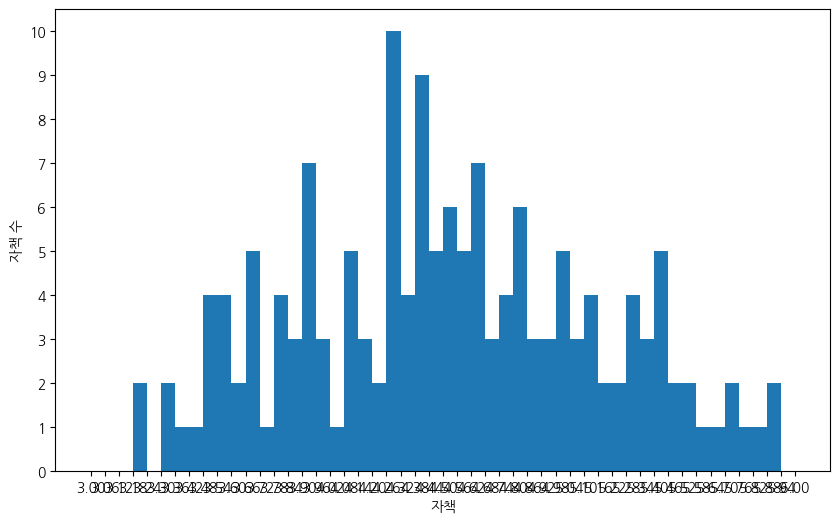

In [76]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
y, x, _ = ax.hist(df[31], bins=50, range=(3., 6.))
# X축에 레이블 부여
ax.set_xlabel('자책')

ax.set_ylabel('자책 수')
ax.set_xticks(np.linspace(3., 6., 50+1))
ax.set_yticks(np.arange(0, y.max()+1))


plt.show()

In [77]:
x[1:],y

(array([3.06, 3.12, 3.18, 3.24, 3.3 , 3.36, 3.42, 3.48, 3.54, 3.6 , 3.66,
        3.72, 3.78, 3.84, 3.9 , 3.96, 4.02, 4.08, 4.14, 4.2 , 4.26, 4.32,
        4.38, 4.44, 4.5 , 4.56, 4.62, 4.68, 4.74, 4.8 , 4.86, 4.92, 4.98,
        5.04, 5.1 , 5.16, 5.22, 5.28, 5.34, 5.4 , 5.46, 5.52, 5.58, 5.64,
        5.7 , 5.76, 5.82, 5.88, 5.94, 6.  ]),
 array([ 0.,  0.,  0.,  2.,  0.,  2.,  1.,  1.,  4.,  4.,  2.,  5.,  1.,
         4.,  3.,  7.,  3.,  1.,  5.,  3.,  2., 10.,  4.,  9.,  5.,  6.,
         5.,  7.,  3.,  4.,  6.,  3.,  3.,  5.,  3.,  4.,  2.,  2.,  4.,
         3.,  5.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  0.]))

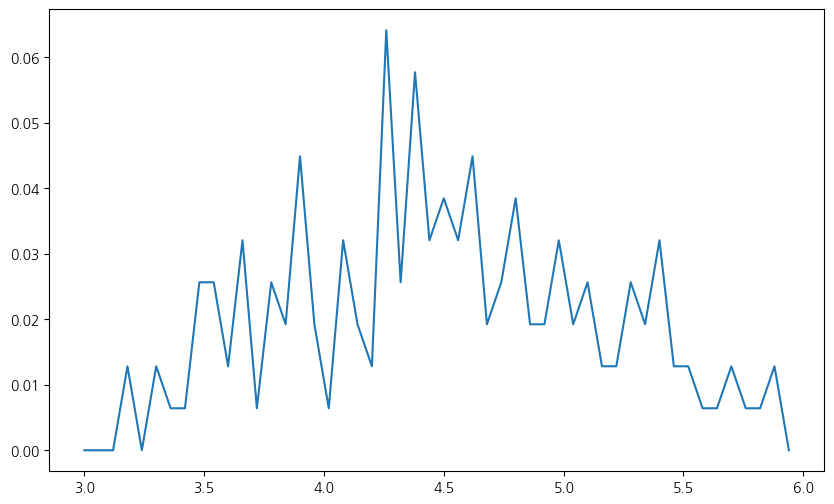

In [78]:
from scipy.stats import norm
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_data=np.array(x[:-1])
y_data=np.array(y/156.)
ax.plot(x_data, y_data)

In [79]:
sum(y_data)

0.9935897435897434

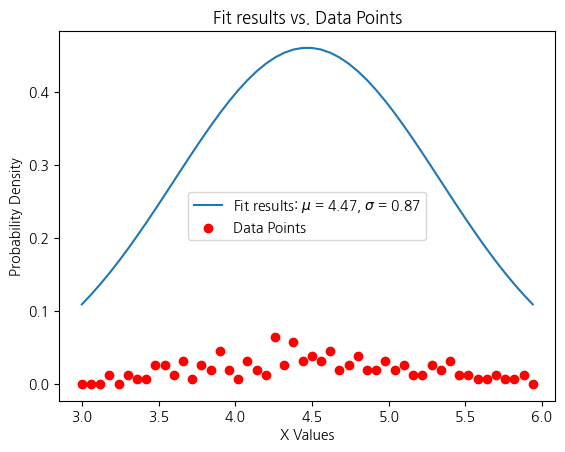

In [80]:
mu, std = norm.fit(x_data)

# 정규분포에 대한 확률밀도함수(PDF) 계산
pdf = norm.pdf(x_data, mu, std)

# 그래프 그리기
plt.plot(x_data, pdf, label='Fit results: $\mu$ = %.2f, $\sigma$ = %.2f' % (mu, std))
plt.scatter(x_data, y_data, label='Data Points', color='red')

# 그래프에 대한 레이블 및 범례 추가
plt.title('Fit results vs. Data Points')
plt.xlabel('X Values')
plt.ylabel('Probability Density')
plt.legend()

# 그래프 표시
plt.show()

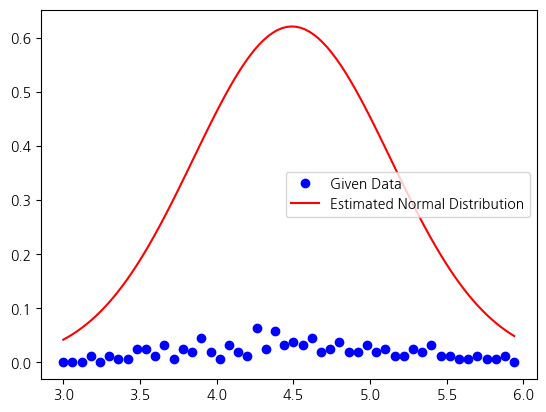

In [81]:
x_data,y_data
mean_estimated = np.sum(x_data * y_data) / np.sum(y_data)
std_dev_estimated = np.sqrt(np.sum(y_data * (x_data - mean_estimated)**2) / np.sum(y_data))

# 유사한 정규분포 생성
x_simulated = np.linspace(min(x_data), max(x_data), 100)
y_simulated = norm.pdf(x_simulated, mean_estimated, std_dev_estimated)

# 시각화
plt.plot(x_data, y_data, 'bo', label='Given Data')
plt.plot(x_simulated, y_simulated, 'r-', label='Estimated Normal Distribution')
plt.legend()
plt.show()

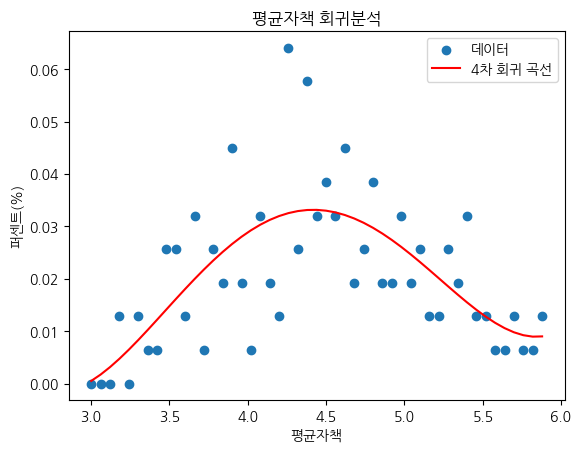

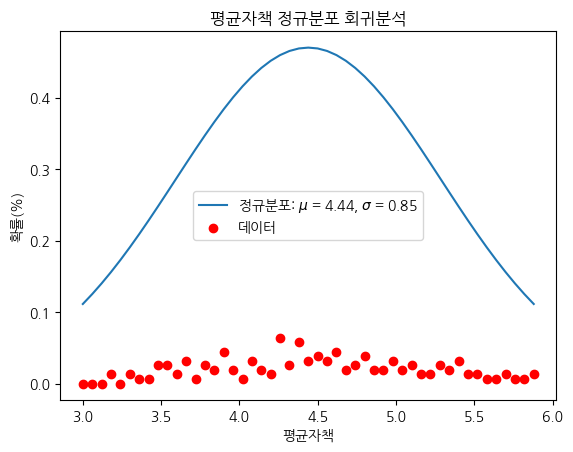

In [82]:

x_data=x_data[:-1]
y_data=y_data[:-1]

poly_fit=np.polyfit(x_data, y_data, 4)
f=np.poly1d(poly_fit)
plt.scatter(x_data, y_data, label='데이터')
plt.plot(x_data, f(x_data), color='red', label='4차 회귀 곡선')
plt.title('평균자책 회귀분석')
plt.xlabel('평균자책')
plt.ylabel('퍼센트(%)')
plt.legend()
plt.show()

mu, std = norm.fit(x_data)
pdf = norm.pdf(x_data, mu, std)
plt.plot(x_data, pdf, label='정규분포: $\mu$ = %.2f, $\sigma$ = %.2f' % (mu, std))
plt.scatter(x_data, y_data, label='데이터', color='red')
plt.title('평균자책 정규분포 회귀분석')
plt.xlabel('평균자책')
plt.ylabel('확률(%)')
plt.legend()

In [83]:
def f(x):
    return norm.pdf(x, mu, std)
rv=stats.norm(mu, std)
print(integrate.quad(f,-np.inf,np.inf))#적분결과
print(f"상위 70 프로 {rv.isf(0.7)}") # 상위 70프로 

(1.0, 8.599393634683855e-09)
상위 70 프로 3.995031409687731


In [84]:
df[33].describe

<bound method NDFrame.describe of 0      1.34
1      1.30
2      1.37
3      1.32
4      1.49
       ... 
151    1.42
152    1.46
153    1.47
154    1.40
155    1.45
Name: 33, Length: 156, dtype: float64>

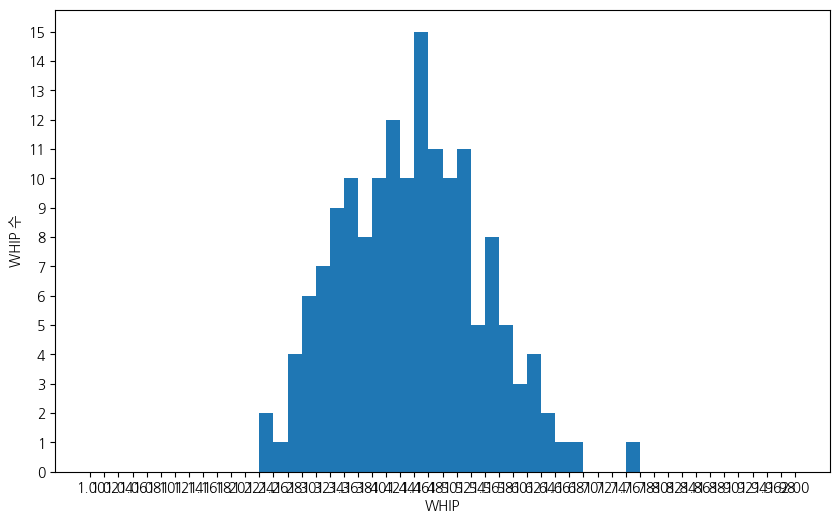

In [85]:
from scipy.stats import norm
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

y, x, _ = ax.hist(df[33], bins=50, range=(1.0, 2.0))
ax.set_xlabel('WHIP')

ax.set_ylabel('WHIP 수')
ax.set_xticks(np.linspace(1.0, 2.0, 50+1))
ax.set_yticks(np.arange(0, y.max()+1))
plt.show()


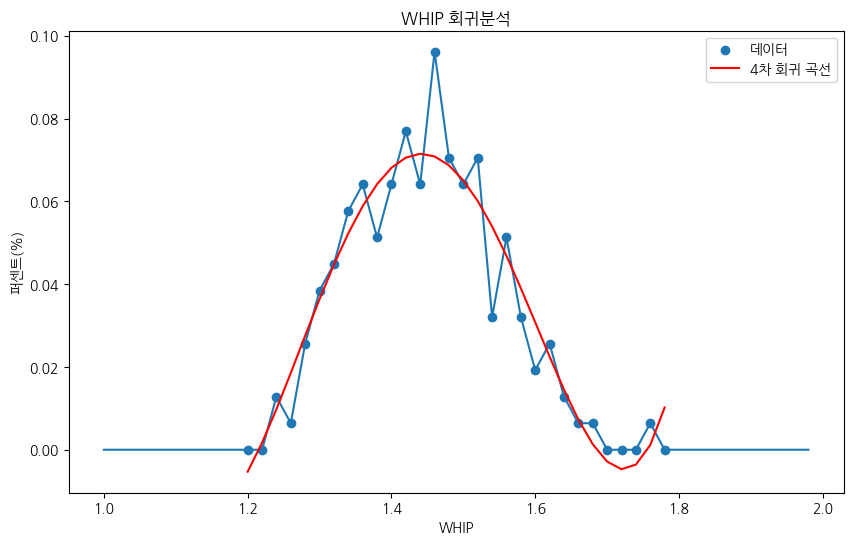

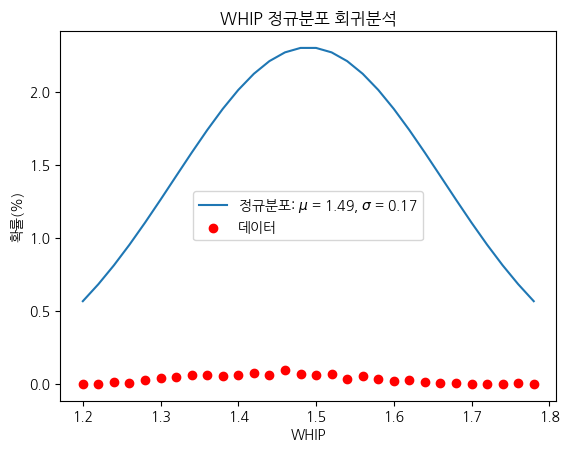

In [86]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_data=np.array(x[:-1])
y_data=np.array(y/156.)
ax.plot(x_data, y_data)

x_data=x_data[10:-10]
y_data=y_data[10:-10]

poly_fit=np.polyfit(x_data, y_data, 4)
f=np.poly1d(poly_fit)
plt.scatter(x_data, y_data, label='데이터')
plt.plot(x_data, f(x_data), color='red', label='4차 회귀 곡선')
plt.title('WHIP 회귀분석')
plt.xlabel('WHIP')
plt.ylabel('퍼센트(%)')
plt.legend()
plt.show()



mu, std = norm.fit(x_data)
pdf = norm.pdf(x_data, mu, std)
plt.plot(x_data, pdf, label='정규분포: $\mu$ = %.2f, $\sigma$ = %.2f' % (mu, std))
plt.scatter(x_data, y_data, label='데이터', color='red')
plt.title('WHIP 정규분포 회귀분석')
plt.xlabel('WHIP')
plt.ylabel('확률(%)')
plt.legend()

In [87]:
def f(x):
    return norm.pdf(x, mu, std)
rv=stats.norm(mu, std)
print(integrate.quad(f,-np.inf,np.inf))#적분결과
print(f"상위 70 프로 {rv.isf(0.7)}") # 상위 70프로

(1.0, 2.8091326425251913e-09)
상위 70 프로 1.3992216413349008


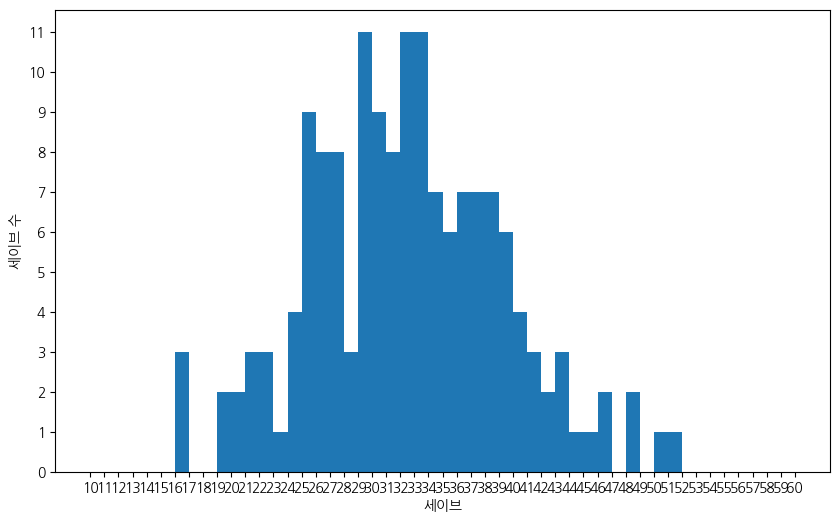

In [88]:
from scipy.stats import norm
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 6))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

y, x, _ = ax.hist(df[36], bins=50, range=(10, 60))
ax.set_xlabel('세이브')

ax.set_ylabel('세이브 수')
ax.set_xticks(np.linspace(10, 60, 50+1))
ax.set_yticks(np.arange(0, y.max()+1))
plt.show()


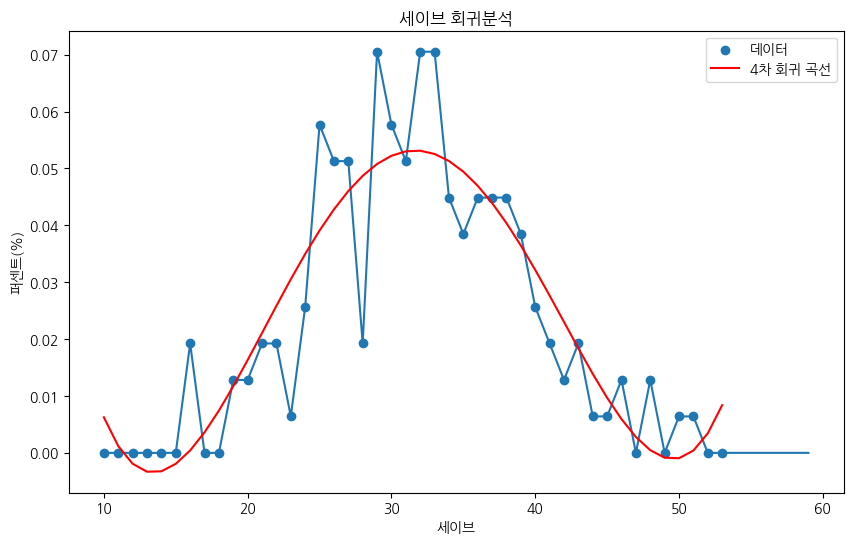

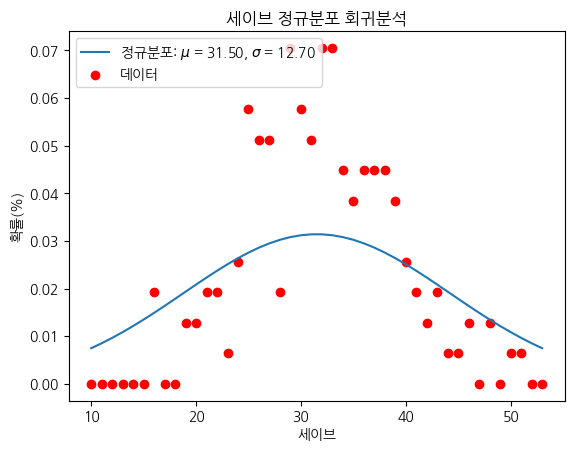

In [89]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_data=np.array(x[:-1])
y_data=np.array(y/156.)
ax.plot(x_data, y_data)

x_data=x_data[0:-6]
y_data=y_data[0:-6]

poly_fit=np.polyfit(x_data, y_data, 4)
f=np.poly1d(poly_fit)
plt.scatter(x_data, y_data, label='데이터')
plt.plot(x_data, f(x_data), color='red', label='4차 회귀 곡선')
plt.title('세이브 회귀분석')
plt.xlabel('세이브')
plt.ylabel('퍼센트(%)')
plt.legend()
plt.show()


mu, std = norm.fit(x_data)
pdf = norm.pdf(x_data, mu, std)
plt.plot(x_data, pdf, label='정규분포: $\mu$ = %.2f, $\sigma$ = %.2f' % (mu, std))
plt.scatter(x_data, y_data, label='데이터', color='red')
plt.title('세이브 정규분포 회귀분석')
plt.xlabel('세이브')
plt.ylabel('확률(%)')
plt.legend()

In [90]:
def f(x):
    return norm.pdf(x, mu, std)
rv=stats.norm(mu, std)
print(integrate.quad(f,-np.inf,np.inf))#적분결과
print(f"상위 30 프로 {rv.isf(0.3)}") # 상위 30프로 

(0.9999999999999999, 8.405643554503404e-09)
상위 30 프로 38.15906063260529


In [91]:
round(1.0-rv.cdf(38.15),2)

0.3

In [92]:
df[36].describe()

count    156.000000
mean      32.000000
std        6.911421
min       16.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       51.000000
Name: 36, dtype: float64

In [93]:
samples = np.random.choice(  np.array(df[36]) , (100, 20) ) 

44.73892764033913 46.86484300727462


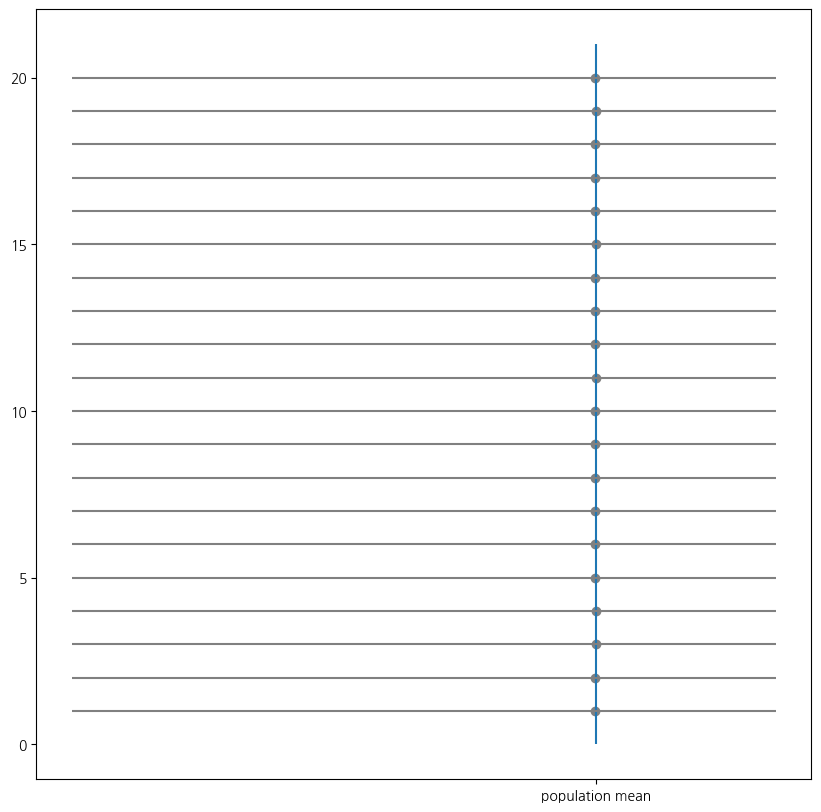

In [94]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
mu,std=df[36].describe().mean(), df[36].describe().std()
print(mu,std)
rv = stats.norm(mu, std)
n_samples = 20
ax.vlines(mu, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * std
    ucl = s_mean_ - rv.isf(0.975) * std
    if lcl <= mu <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([mu])
ax.set_xticklabels(['population mean'])

plt.show()

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
data = np.array(df[36])
df = pd.DataFrame(data)

# 시뮬레이션 횟수 설정
num_simulations = 1000

# 평균과 표준 편차 계산
sample_mean = np.mean(df[36])
sample_std = np.std(df[36], ddof=1)

# 시뮬레이션을 위한 랜덤 샘플링 및 평균 계산
simulated_means = [np.mean(np.random.choice(df[36], len(df), replace=True)) for _ in range(num_simulations)]

# 95% 신뢰구간 계산
confidence_interval = np.percentile(simulated_means, [2.5, 97.5])

# 결과 출력
print(f"Sample Mean: {sample_mean}")
print(f"95% Confidence Interval: {confidence_interval}")

# 히스토그램과 신뢰구간 표시
plt.hist(simulated_means, bins=30, density=True, alpha=0.7, color='skyblue')
plt.axvline(x=sample_mean, color='red', linestyle='dashed', linewidth=2, label='평균')
plt.axvline(x=confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='하위 CI')
plt.axvline(x=confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='상위 CI')
plt.legend()
plt.title('히스토그램 분산')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.show()


KeyError: 36